In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2 +0.9*x+2+np.random.randn(200,1)

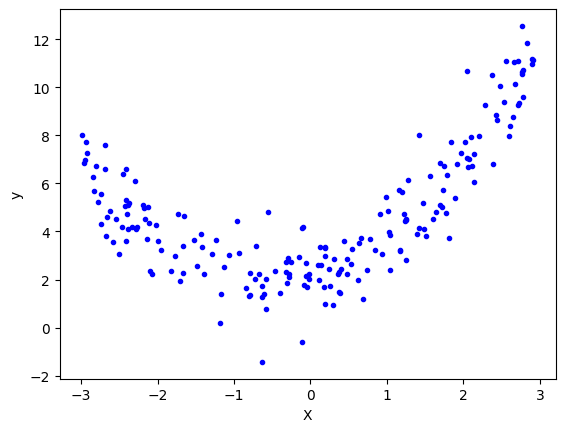

In [3]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.08399769455057404

In [10]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.83247374 0.76813863]]
[2.26800555]


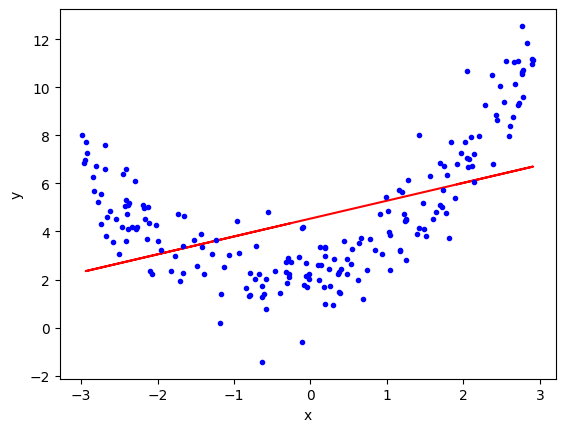

In [5]:
plt.plot(x_train,lr.predict(x_train),color='red')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [8]:
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8812918216918636

In [9]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.83247374 0.76813863]]
[2.26800555]


In [11]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

In [ ]:
plt.plot(x_new,y_new)

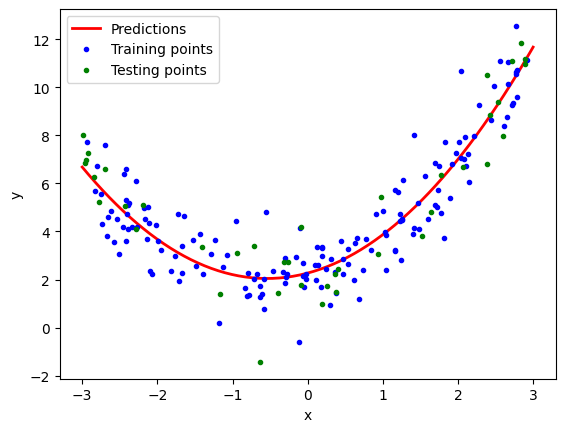

In [12]:
plt.plot(x_new,y_new,'r-',linewidth=2,label="Predictions")
plt.plot(x_train,y_train,'b.',label='Training points')
plt.plot(x_test,y_test,'g.',label='Testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()